# Exploration graphique des données Hi-C

## Chargement des modules Python

In [1]:
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py

In [2]:
import cooler

In [3]:
# The following directive activates inline plotting
%matplotlib inline

## Chargement des données

In [5]:
filepath = "/home/bureau/projects/def-bureau/distiller/results_iPSC/coolers_library_group/Neuron_libraries.hg38.mapq_30.2048.cool"

The Python`cooler` package is just a thin wrapper over `h5py`.
It lets you access the data tables as Pandas data frames and series.

In [6]:
c = cooler.Cooler(filepath)

In [21]:
%whos

Variable   Type               Data/Info
---------------------------------------
arr        ndarray            200x200: 40000 elems, type `int32`, 160000 bytes (156.25 kb)
c          Cooler             <Cooler "Neuron_libraries<...>38.mapq_30.2048.cool::/">
cooler     module             <module 'cooler' from '/h<...>ages/cooler/__init__.py'>
filepath   str                /home/bureau/projects/def<...>es.hg38.mapq_30.2048.cool
h5py       module             <module 'h5py' from '/hom<...>ckages/h5py/__init__.py'>
np         module             <module 'numpy' from '/cv<...>kages/numpy/__init__.py'>
op         module             <module 'posixpath' from <...>/python3.8/posixpath.py'>
pandas     module             <module 'pandas' from '/c<...>ages/pandas/__init__.py'>
plt        module             <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
weights    RangeSelector1D    <cooler.core.RangeSelecto<...>object at 0x2ad550c29880>


### Dictionnaire des infos

In [8]:
c.info

{'bin-size': 2048,
 'bin-type': 'fixed',
 'creation-date': '2021-01-11T12:47:55.248732',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.10',
 'genome-assembly': 'hg38',
 'metadata': {},
 'nbins': 1567257,
 'nchroms': 455,
 'nnz': 121193108,
 'storage-mode': 'symmetric-upper',
 'sum': 148203568}

### Examen des données

In [9]:
c.chroms()[:5]

,name,length
0,chr1,248956422
1,chr2,242193529
2,chr3,198295559
3,chr4,190214555
4,chr5,181538259


In [10]:
c.chromsizes[:24]

name
chr1     248956422
chr2     242193529
chr3     198295559
chr4     190214555
chr5     181538259
chr6     170805979
chr7     159345973
chrX     156040895
chr8     145138636
chr9     138394717
chr11    135086622
chr10    133797422
chr12    133275309
chr13    114364328
chr14    107043718
chr15    101991189
chr16     90338345
chr17     83257441
chr18     80373285
chr20     64444167
chr19     58617616
chrY      57227415
chr22     50818468
chr21     46709983
Name: length, dtype: int32

In [12]:
c.bins()[:10]

,chrom,start,end,weight
0,chr1,0,2048,NaN
1,chr1,2048,4096,NaN
2,chr1,4096,6144,NaN
3,chr1,6144,8192,NaN
4,chr1,8192,10240,NaN
5,chr1,10240,12288,NaN
6,chr1,12288,14336,NaN
7,chr1,14336,16384,NaN
8,chr1,16384,18432,NaN
9,chr1,18432,20480,NaN


Use the `join=True` option if you would like to expand the bin IDs into genomic bin coordinates by joining the output with the bin table.

In [13]:
c.pixels(join=True)[:10]

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr1,51200,53248,chr3,55420928,55422976,1
1,chr1,53248,55296,chr15,92790784,92792832,1
2,chr1,57344,59392,chr15,23451648,23453696,1
3,chr1,57344,59392,chr16,6389760,6391808,1
4,chr1,61440,63488,chr4,65851392,65853440,1
5,chr1,61440,63488,chr11,123011072,123013120,1
6,chr1,61440,63488,chr15,101699584,101701632,1
7,chr1,69632,71680,chr12,128792576,128794624,1
8,chr1,114688,116736,chr1,151052288,151054336,1
9,chr1,114688,116736,chr5,176048128,176050176,1


In [14]:
arr = c.matrix(balance=False)[1000:1200, 1000:1200]
arr

array([[22,  1,  1, ...,  0,  0,  0],
       [ 1, 10,  4, ...,  0,  0,  0],
       [ 1,  4, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 14,  5,  3],
       [ 0,  0,  0, ...,  5,  7,  5],
       [ 0,  0,  0, ...,  3,  5, 16]], dtype=int32)

## Visualisation d'une sous-matrice

<ipython-input-15-6067e96817f5>:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(arr), cmap='YlOrRd')


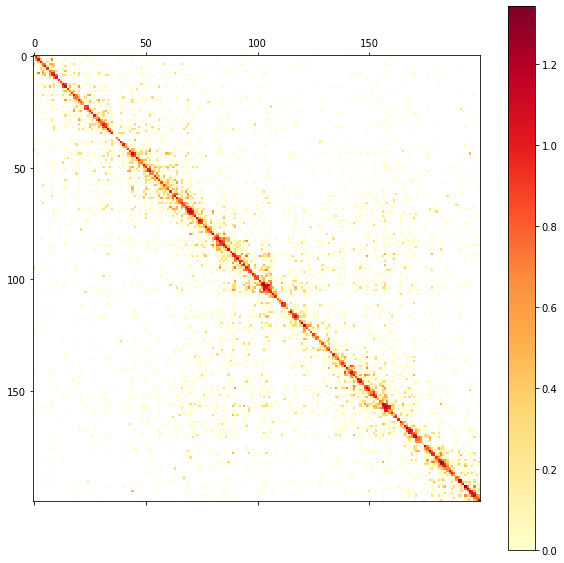

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)

Extraction des poids

In [30]:
weights = c.bins()['weight']

Examen des poids

In [33]:
wp = pandas.Series(weights)
wp.median()

AttributeError: 'RangeSelector1D' object has no attribute 'items'

In [25]:
weights[1000:1200]

1000    0.071484
1001    0.257460
1002    0.136967
1003    0.194456
1004    0.082157
          ...   
1195    0.054597
1196    0.073136
1197    0.048094
1198    0.143940
1199    0.095542
Name: weight, Length: 200, dtype: float64

## Normaliser

In [26]:
arr2 = c.matrix(balance=True, sparse=True)[1000:1200, 1000:1200].toarray()
arr2

array([[0.11242031, 0.01840436, 0.00979099, ..., 0.        , 0.        ,
        0.        ],
       [0.01840436, 0.6628566 , 0.14105396, ..., 0.        , 0.        ,
        0.        ],
       [0.00979099, 0.14105396, 0.24387898, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03238213, 0.03461317,
        0.01378499],
       [0.        , 0.        , 0.        , ..., 0.03461317, 0.14503185,
        0.0687621 ],
       [0.        , 0.        , 0.        , ..., 0.01378499, 0.0687621 ,
        0.14605382]])

<ipython-input-27-7cdc9008a6f6>:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(arr2), cmap='YlOrRd')


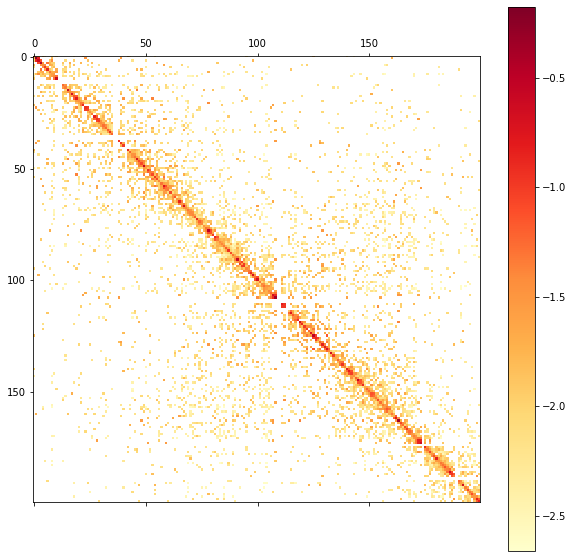

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr2), cmap='YlOrRd')
fig.colorbar(im)

### Affichage d'un chromosome entier

# Accès aux données en h5py directement

In [28]:
h5 = h5py.File(filepath, 'r')

In [29]:
h5.keys()

<KeysViewHDF5 ['bins', 'chroms', 'indexes', 'pixels']>

In [49]:
wp = pandas.Series(h5["bins"]["weight"])
wp.mean()

0.08527918318817855

In [51]:
logw = pandas.Series(np.log10(h5["bins"]["weight"]))
logw.mean()

-1.1093962171488134

Distribution des poids

(array([4.00000e+00, 3.00000e+00, 4.00000e+00, 2.90000e+01, 1.84872e+05,
        9.11310e+05, 2.03932e+05, 1.29680e+04, 8.99000e+02, 1.73000e+02]),
 array([-2.93488078, -2.60375998, -2.27263919, -1.94151839, -1.61039759,
        -1.2792768 , -0.948156  , -0.6170352 , -0.2859144 ,  0.04520639,
         0.37632719]),
 <BarContainer object of 10 artists>)

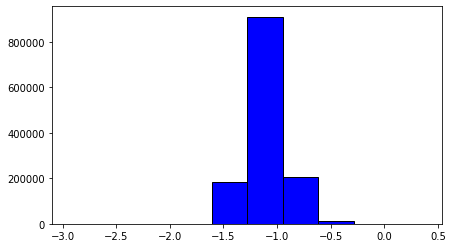

In [43]:
plt.figure(figsize = (7, 4)) 

plt.hist(np.log10(wp), edgecolor='black', color = "blue") 
